# Python for Applied Biology - Practical Notebook 🧬💻

**Welcome!** 👋

This notebook contains 4 real Applied Biology examples **with data visualizations**!

**Instructions:**
- Read each markdown cell carefully
- Run code cells one by one (Shift + Enter)
- Look at the graphs - they make the data come alive!
- Try the exercises at the end of each section
- Don't worry about mistakes - they're part of learning!

**Let's begin!** 🚀

In [1]:
# Import plotting library (we'll use this for visualizations)
import matplotlib.pyplot as plt

# This makes plots appear in the notebook
%matplotlib inline

print('✅ Plotting library ready!')
print('📊 You\'ll see graphs appear below code cells')

✅ Plotting library ready!
📊 You'll see graphs appear below code cells


---
## Section A: Blood Cell Count Checker 🩸

### The Biology:
Blood tests measure different cell types:
- **WBC** (White Blood Cells): 4,000-11,000 cells/µL
- **RBC** (Red Blood Cells): 4.5-5.5 million cells/µL
- **Platelets**: 150,000-400,000 cells/µL

### The Problem:
A patient gets a blood test. Are the results normal?

### What Python Will Do:
Check if each value falls within the normal range **AND** visualize the results!

In [2]:
# Blood Cell Count Checker
print('=== Blood Cell Count Analysis ===')
print()

# Patient test results
wbc = 8500  # White blood cells (cells/µL)
rbc = 4.8   # Red blood cells (million cells/µL)
platelets = 250000  # Platelets (cells/µL)

print(f'Patient Results:')
print(f'WBC: {wbc:,} cells/µL')
print(f'RBC: {rbc} million cells/µL')
print(f'Platelets: {platelets:,} cells/µL')
print()

# Check WBC
print('--- Analysis ---')
if 4000 <= wbc <= 11000:
    print('✅ WBC: Normal')
    wbc_status = 'Normal'
elif wbc < 4000:
    print('⚠️ WBC: Low (possible infection risk)')
    wbc_status = 'Low'
else:
    print('⚠️ WBC: High (possible infection/inflammation)')
    wbc_status = 'High'

# Check RBC
if 4.5 <= rbc <= 5.5:
    print('✅ RBC: Normal')
    rbc_status = 'Normal'
elif rbc < 4.5:
    print('⚠️ RBC: Low (possible anemia)')
    rbc_status = 'Low'
else:
    print('⚠️ RBC: High (needs investigation)')
    rbc_status = 'High'

# Check Platelets
if 150000 <= platelets <= 400000:
    print('✅ Platelets: Normal')
    plt_status = 'Normal'
elif platelets < 150000:
    print('⚠️ Platelets: Low (bleeding risk)')
    plt_status = 'Low'
else:
    print('⚠️ Platelets: High (clotting risk)')
    plt_status = 'High'

=== Blood Cell Count Analysis ===

Patient Results:
WBC: 8,500 cells/µL
RBC: 4.8 million cells/µL
Platelets: 250,000 cells/µL

--- Analysis ---
✅ WBC: Normal
✅ RBC: Normal
✅ Platelets: Normal



📊 Creating visual comparison...


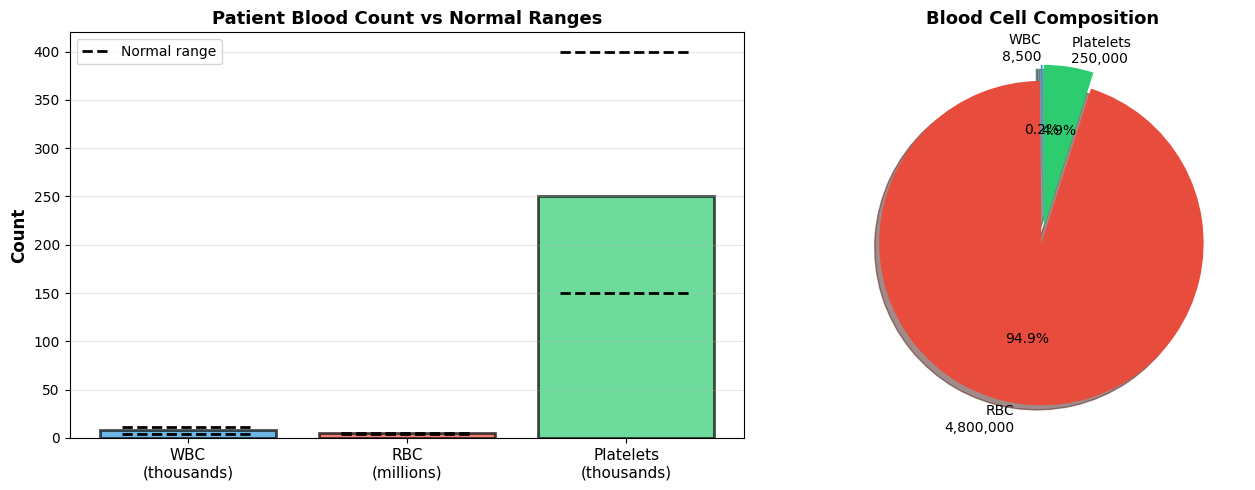


✅ Visualization complete!
💡 The bar chart shows how patient values compare to normal ranges
💡 The pie chart shows the relative proportions of each cell type


In [3]:
# VISUALIZATION 1: Bar Chart Comparing to Normal Ranges
print('\n📊 Creating visual comparison...')

# Create figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Bar chart comparison
cell_types = ['WBC\n(thousands)', 'RBC\n(millions)', 'Platelets\n(thousands)']
patient_values = [wbc/1000, rbc, platelets/1000]  # Scale for comparison
normal_mins = [4, 4.5, 150]
normal_maxs = [11, 5.5, 400]

x_pos = range(len(cell_types))

# Plot patient values
ax1.bar(x_pos, patient_values, color=['#3498db', '#e74c3c', '#2ecc71'], 
        alpha=0.7, edgecolor='black', linewidth=2)

# Add normal range indicators
for i, (min_val, max_val) in enumerate(zip(normal_mins, normal_maxs)):
    ax1.plot([i-0.3, i+0.3], [min_val, min_val], 'k--', linewidth=2, label='Normal range' if i==0 else '')
    ax1.plot([i-0.3, i+0.3], [max_val, max_val], 'k--', linewidth=2)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(cell_types, fontsize=11)
ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
ax1.set_title('Patient Blood Count vs Normal Ranges', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Right plot: Pie chart of blood composition
composition = [wbc, rbc*1000000, platelets]  # Actual cell counts
labels = [f'WBC\n{wbc:,}', f'RBC\n{int(rbc*1000000):,}', f'Platelets\n{platelets:,}']
colors = ['#3498db', '#e74c3c', '#2ecc71']
explode = (0.05, 0.05, 0.05)  # Slightly separate slices

ax2.pie(composition, labels=labels, colors=colors, autopct='%1.1f%%',
        explode=explode, shadow=True, startangle=90)
ax2.set_title('Blood Cell Composition', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

print('\n✅ Visualization complete!')
print('💡 The bar chart shows how patient values compare to normal ranges')
print('💡 The pie chart shows the relative proportions of each cell type')

### 💪 **Your Turn!**
Try changing the values in the first code cell above:
- Set `wbc = 3000` (low) - see how the graph changes!
- Set `rbc = 3.5` (anemia) - bar will go below normal range
- Set `platelets = 500000` (high) - bar will exceed normal range

Run both code cells again and watch the visualization update!


---
## Section B: Bacteria Growth Model 🦠

### The Biology:
Bacteria reproduce by binary fission (splitting in two).
Under ideal conditions, *E. coli* doubles every ~20 minutes.

### The Formula:
**N(t) = N₀ × 2^(t/g)**
- N(t) = population at time t
- N₀ = initial population
- g = generation time (doubling time)

### What Python Will Do:
Simulate bacterial growth AND show the exponential curve!

In [4]:
# Bacterial Growth Simulation
print('=== Bacterial Growth Simulation ===')
print('Organism: E. coli')
print('Doubling time: 20 minutes\n')

# Initial conditions
initial_population = 100
doubling_time_minutes = 20
total_time_hours = 3

print(f'Starting population: {initial_population} cells')
print(f'Simulation time: {total_time_hours} hours\n')
print('Time (min) | Population')
print('-' * 30)

# Store data for plotting
time_points = []
populations = []

# Simulate growth every 20 minutes
current_population = initial_population
time = 0

while time <= total_time_hours * 60:
    print(f'{time:10} | {current_population:,}')
    
    # Store for plotting
    time_points.append(time)
    populations.append(current_population)
    
    # Double the population
    current_population = current_population * 2
    time += doubling_time_minutes

print(f'\n✅ After {total_time_hours} hours: {current_population:,} cells')
print(f'   Growth factor: {current_population/initial_population:.0f}x')

=== Bacterial Growth Simulation ===
Organism: E. coli
Doubling time: 20 minutes

Starting population: 100 cells
Simulation time: 3 hours

Time (min) | Population
------------------------------
         0 | 100
        20 | 200
        40 | 400
        60 | 800
        80 | 1,600
       100 | 3,200
       120 | 6,400
       140 | 12,800
       160 | 25,600
       180 | 51,200

✅ After 3 hours: 102,400 cells
   Growth factor: 1024x



📈 Creating growth curve visualization...


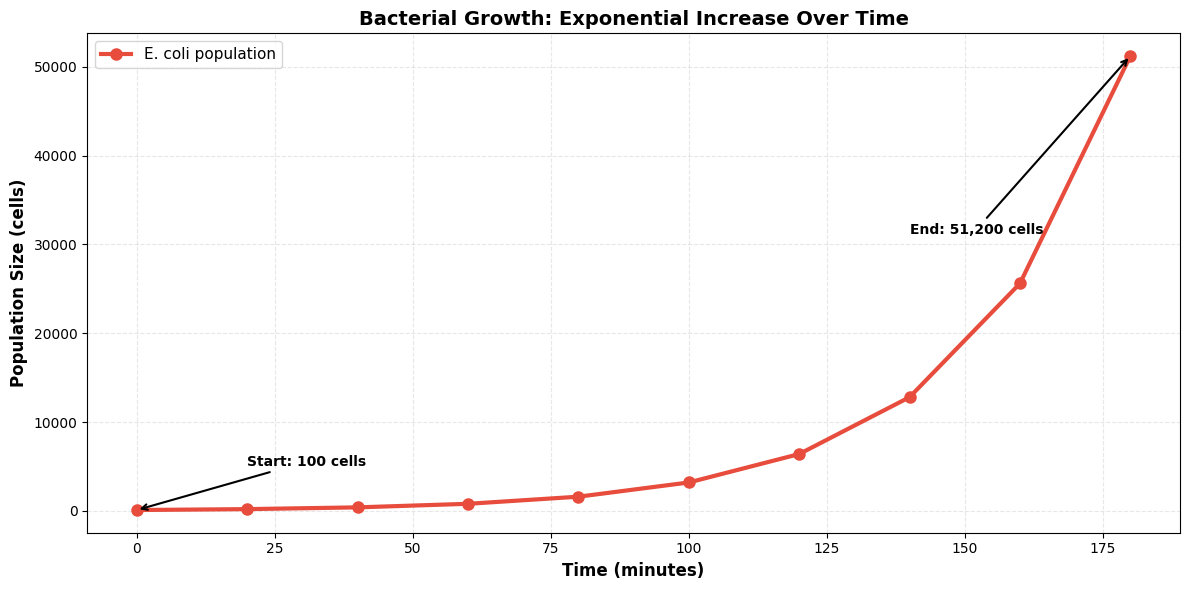


✅ Growth curve complete!
💡 Notice the EXPONENTIAL curve - starts slow, then explodes!
💡 This is why bacterial infections can become serious so quickly


In [5]:
# VISUALIZATION 2: Exponential Growth Curve
print('\n📈 Creating growth curve visualization...')

plt.figure(figsize=(12, 6))

# Plot the growth curve
plt.plot(time_points, populations, marker='o', linewidth=3, 
         markersize=8, color='#e74c3c', label='E. coli population')

# Add grid for readability
plt.grid(True, alpha=0.3, linestyle='--')

# Labels and title
plt.xlabel('Time (minutes)', fontsize=12, fontweight='bold')
plt.ylabel('Population Size (cells)', fontsize=12, fontweight='bold')
plt.title('Bacterial Growth: Exponential Increase Over Time', fontsize=14, fontweight='bold')

# Add annotations at key points
plt.annotate(f'Start: {initial_population} cells', 
             xy=(time_points[0], populations[0]), 
             xytext=(20, populations[0]+5000),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
             fontsize=10, fontweight='bold')

plt.annotate(f'End: {populations[-1]:,} cells', 
             xy=(time_points[-1], populations[-1]), 
             xytext=(time_points[-1]-40, populations[-1]-20000),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
             fontsize=10, fontweight='bold')

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print('\n✅ Growth curve complete!')
print('💡 Notice the EXPONENTIAL curve - starts slow, then explodes!')
print('💡 This is why bacterial infections can become serious so quickly')

### 💪 **Your Turn!**
Experiment with the first code cell:
- `initial_population = 50` (smaller starting size) - curve starts lower
- `total_time_hours = 5` (longer growth) - curve gets MUCH steeper!
- `doubling_time_minutes = 30` (slower growth) - less dramatic curve

Run both cells again to see how the graph changes!


---
## Section C: Pest Population Change Model 🐛

### The Context:
Ugandan farmers need to predict pest populations to:
- Know when to spray pesticides
- Implement Integrated Pest Management (IPM)
- Protect crops without overusing chemicals

### What Python Will Do:
Model pest population AND show threat zones visually!

In [6]:
# Pest Population Model
print('=== Agricultural Pest Population Tracker ===')
print('Crop: Maize')
print('Pest: Fall Armyworm\n')

# Initial conditions
initial_pests = 50
days = 10
daily_growth_rate = 0.15  # 15% increase per day

print(f'Starting population: {initial_pests} pests')
print(f'Daily growth rate: {daily_growth_rate*100}%\n')
print('Day | Pest Count | Status')
print('-' * 40)

# Store data for plotting
day_list = []
pest_counts = []
statuses = []

current_population = initial_pests

for day in range(days + 1):
    # Determine threat level
    if current_population < 100:
        status = 'Low threat'
    elif current_population < 300:
        status = 'Moderate - monitor'
    else:
        status = '⚠️ High - take action!'
    
    print(f'{day:3} | {int(current_population):10} | {status}')
    
    # Store for plotting
    day_list.append(day)
    pest_counts.append(current_population)
    statuses.append(status)
    
    # Calculate next day's population
    current_population = current_population * (1 + daily_growth_rate)

print(f'\n📊 Prediction: Population reaches {int(current_population)} by day {days}')
print('💡 Recommendation: Implement control measures by day 7')

=== Agricultural Pest Population Tracker ===
Crop: Maize
Pest: Fall Armyworm

Starting population: 50 pests
Daily growth rate: 15.0%

Day | Pest Count | Status
----------------------------------------
  0 |         50 | Low threat
  1 |         57 | Low threat
  2 |         66 | Low threat
  3 |         76 | Low threat
  4 |         87 | Low threat
  5 |        100 | Moderate - monitor
  6 |        115 | Moderate - monitor
  7 |        133 | Moderate - monitor
  8 |        152 | Moderate - monitor
  9 |        175 | Moderate - monitor
 10 |        202 | Moderate - monitor

📊 Prediction: Population reaches 232 by day 10
💡 Recommendation: Implement control measures by day 7



🐛 Creating pest population visualization with threat zones...


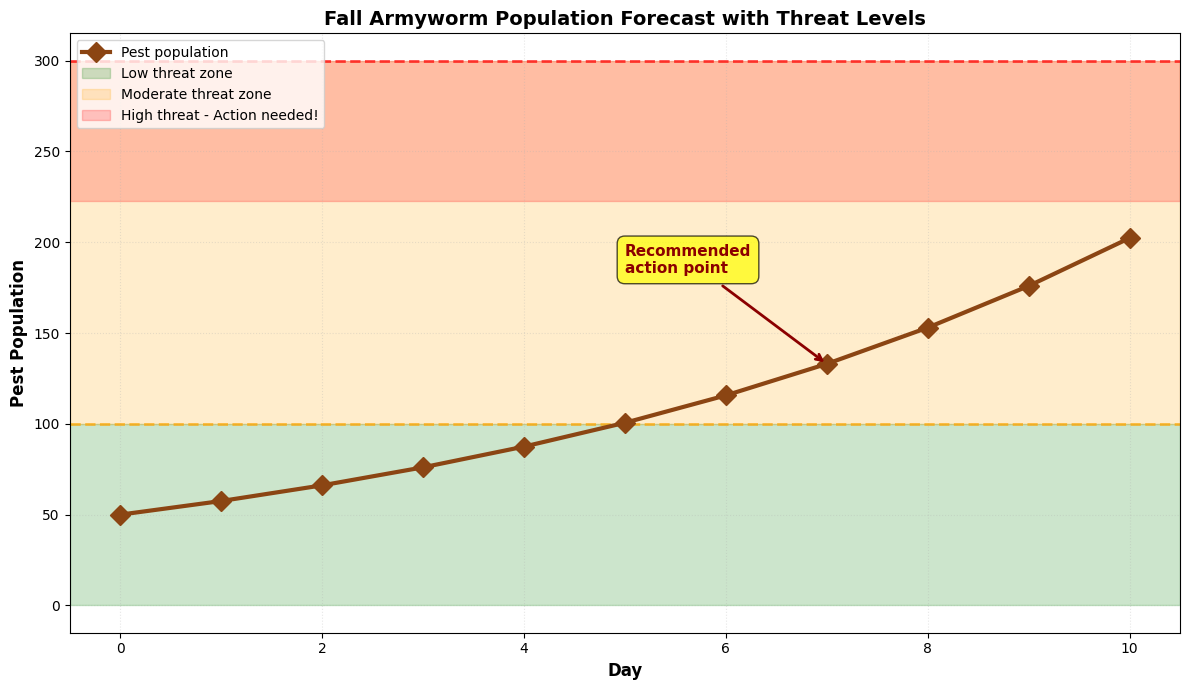


✅ Threat zone visualization complete!
💡 Green zone = Monitor only
💡 Orange zone = Increase monitoring, prepare intervention
💡 Red zone = Immediate action required to protect crops!


In [7]:
# VISUALIZATION 3: Pest Population with Threat Zones
print('\n🐛 Creating pest population visualization with threat zones...')

fig, ax = plt.subplots(figsize=(12, 7))

# Plot the pest population line
ax.plot(day_list, pest_counts, marker='D', linewidth=3, markersize=10,
        color='#8B4513', label='Pest population', zorder=3)

# Add colored zones for threat levels
ax.axhspan(0, 100, alpha=0.2, color='green', label='Low threat zone')
ax.axhspan(100, 300, alpha=0.2, color='orange', label='Moderate threat zone')
ax.axhspan(300, max(pest_counts)*1.1, alpha=0.2, color='red', label='High threat - Action needed!')

# Add threshold lines
ax.axhline(y=100, color='orange', linestyle='--', linewidth=2, alpha=0.7)
ax.axhline(y=300, color='red', linestyle='--', linewidth=2, alpha=0.7)

# Labels and title
ax.set_xlabel('Day', fontsize=12, fontweight='bold')
ax.set_ylabel('Pest Population', fontsize=12, fontweight='bold')
ax.set_title('Fall Armyworm Population Forecast with Threat Levels', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle=':')
ax.legend(loc='upper left', fontsize=10)

# Add text annotation for recommended action day
action_day = 7
action_population = pest_counts[action_day]
ax.annotate('Recommended\naction point', 
            xy=(action_day, action_population),
            xytext=(action_day-2, action_population+50),
            arrowprops=dict(arrowstyle='->', color='darkred', lw=2),
            fontsize=11, fontweight='bold', color='darkred',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

print('\n✅ Threat zone visualization complete!')
print('💡 Green zone = Monitor only')
print('💡 Orange zone = Increase monitoring, prepare intervention')
print('💡 Red zone = Immediate action required to protect crops!')

### 💪 **Your Turn!**
Try in the first code cell:
- `daily_growth_rate = -0.10` (negative = population declining, pesticide working!)
- `initial_pests = 200` (start in orange zone)
- `daily_growth_rate = 0.25` (faster growth = reaches red zone quicker)

Run both cells and watch how the colored zones help visualize the threat!


---
## Section D: Fermentation Monitoring 🍺

### The Biology:
Fermentation converts sugar to alcohol and CO₂.
Used in: brewing, bioethanol, baking, food production.

### The Process:
Yeast consumes glucose and produces ethanol:
**C₆H₁₂O₆ → 2 C₂H₅OH + 2 CO₂**

### What Python Will Do:
Track sugar AND alcohol over time - watch the transformation!

In [8]:
# Fermentation Monitoring Simulation
print('=== Fermentation Process Monitor ===')
print('Process: Ethanol production from glucose')
print('Organism: Saccharomyces cerevisiae (yeast)\n')

# Initial conditions
initial_sugar_g = 100  # grams of glucose
sugar_consumption_rate = 8  # grams per hour
hours = 10

print(f'Starting sugar: {initial_sugar_g}g')
print(f'Consumption rate: {sugar_consumption_rate}g/hour\n')
print('Hour | Sugar (g) | Alcohol (g) | Status')
print('-' * 50)

# Store data for plotting
hour_list = []
sugar_levels = []
alcohol_levels = []

current_sugar = initial_sugar_g
total_alcohol = 0

for hour in range(hours + 1):
    # Calculate alcohol produced (simplified: 0.51g alcohol per 1g sugar)
    sugar_consumed = min(sugar_consumption_rate, current_sugar)
    alcohol_produced = sugar_consumed * 0.51
    
    # Determine fermentation status
    if current_sugar > 50:
        status = 'Active'
    elif current_sugar > 10:
        status = 'Slowing'
    else:
        status = 'Complete'
    
    print(f'{hour:4} | {current_sugar:9.1f} | {total_alcohol:11.1f} | {status}')
    
    # Store for plotting
    hour_list.append(hour)
    sugar_levels.append(current_sugar)
    alcohol_levels.append(total_alcohol)
    
    # Update for next hour
    current_sugar = max(0, current_sugar - sugar_consumption_rate)
    total_alcohol += alcohol_produced

print(f'\n✅ Fermentation complete!')
print(f'   Sugar consumed: {initial_sugar_g - current_sugar:.1f}g')
print(f'   Alcohol produced: {total_alcohol:.1f}g')
print(f'   Efficiency: {(total_alcohol/(initial_sugar_g*0.51))*100:.1f}%')

=== Fermentation Process Monitor ===
Process: Ethanol production from glucose
Organism: Saccharomyces cerevisiae (yeast)

Starting sugar: 100g
Consumption rate: 8g/hour

Hour | Sugar (g) | Alcohol (g) | Status
--------------------------------------------------
   0 |     100.0 |         0.0 | Active
   1 |      92.0 |         4.1 | Active
   2 |      84.0 |         8.2 | Active
   3 |      76.0 |        12.2 | Active
   4 |      68.0 |        16.3 | Active
   5 |      60.0 |        20.4 | Active
   6 |      52.0 |        24.5 | Active
   7 |      44.0 |        28.6 | Slowing
   8 |      36.0 |        32.6 | Slowing
   9 |      28.0 |        36.7 | Slowing
  10 |      20.0 |        40.8 | Slowing

✅ Fermentation complete!
   Sugar consumed: 88.0g
   Alcohol produced: 44.9g
   Efficiency: 88.0%



🍺 Creating fermentation progress visualization...


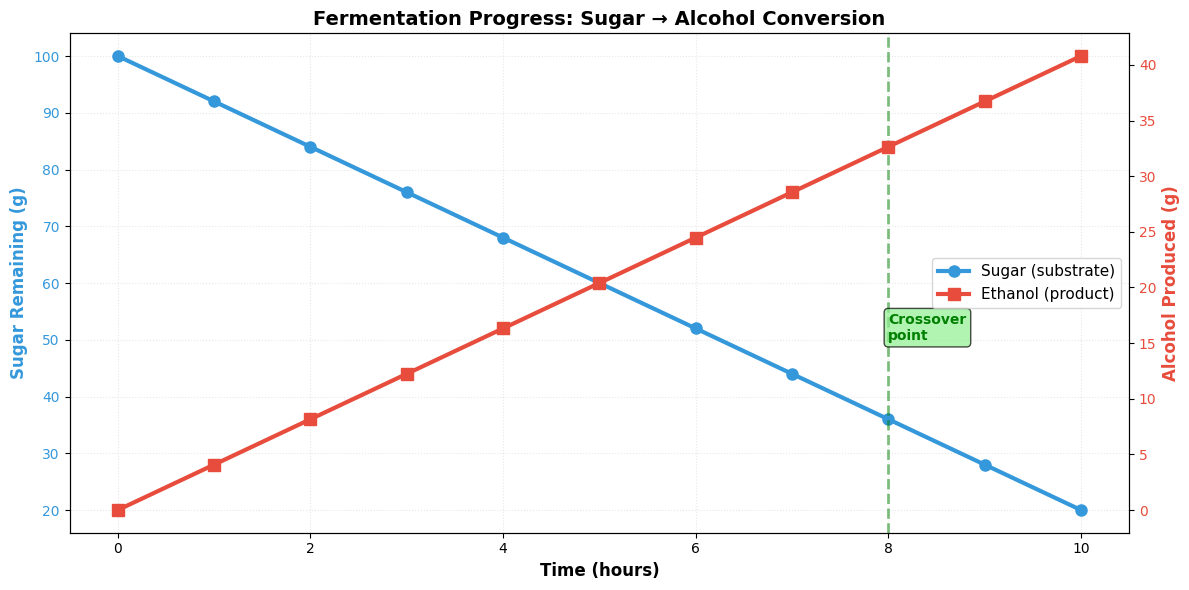


✅ Fermentation visualization complete!
💡 Blue line (Sugar): Decreases as yeast consumes it
💡 Red line (Alcohol): Increases as fermentation proceeds
💡 The mirror image shows the conversion process clearly!


In [9]:
# VISUALIZATION 4: Dual-Line Plot - Sugar vs Alcohol
print('\n🍺 Creating fermentation progress visualization...')

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot sugar levels (decreasing)
color1 = '#3498db'
ax1.set_xlabel('Time (hours)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Sugar Remaining (g)', fontsize=12, fontweight='bold', color=color1)
ax1.plot(hour_list, sugar_levels, marker='o', linewidth=3, markersize=8,
         color=color1, label='Sugar (substrate)')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3, linestyle=':')

# Create second y-axis for alcohol
ax2 = ax1.twinx()
color2 = '#e74c3c'
ax2.set_ylabel('Alcohol Produced (g)', fontsize=12, fontweight='bold', color=color2)
ax2.plot(hour_list, alcohol_levels, marker='s', linewidth=3, markersize=8,
         color=color2, label='Ethanol (product)')
ax2.tick_params(axis='y', labelcolor=color2)

# Title
ax1.set_title('Fermentation Progress: Sugar → Alcohol Conversion', fontsize=14, fontweight='bold')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right', fontsize=11)

# Highlight the crossover point (if it exists)
for i in range(len(hour_list)-1):
    if sugar_levels[i] > alcohol_levels[i] and sugar_levels[i+1] <= alcohol_levels[i+1]:
        cross_hour = hour_list[i]
        ax1.axvline(x=cross_hour, color='green', linestyle='--', linewidth=2, alpha=0.5)
        ax1.text(cross_hour, max(sugar_levels)/2, 'Crossover\npoint', 
                fontsize=10, fontweight='bold', color='green',
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.show()

print('\n✅ Fermentation visualization complete!')
print('💡 Blue line (Sugar): Decreases as yeast consumes it')
print('💡 Red line (Alcohol): Increases as fermentation proceeds')
print('💡 The mirror image shows the conversion process clearly!')

### 💪 **Your Turn!**
Modify the first code cell:
- `initial_sugar_g = 200` (more substrate = more alcohol produced)
- `sugar_consumption_rate = 12` (faster fermentation = steeper curves)
- `hours = 15` (longer process = see the curves flatten out)

Run both cells and watch how the two lines respond!


---
## 🎉 Congratulations!

You've just completed 4 real Applied Biology examples with **DATA VISUALIZATIONS** in Python!

### What You Learned:
✅ Variables and data types
✅ If statements (making decisions)
✅ Loops (for and while)
✅ Real biology applications
✅ **Creating plots with matplotlib**
✅ **Different chart types: bar, pie, line, multi-axis**

### Types of Plots You Created:
📊 **Bar charts** - Comparing values to ranges
🥧 **Pie charts** - Showing proportions
📈 **Line plots** - Tracking change over time
🎨 **Zone plots** - Visualizing thresholds
📉 **Dual-axis plots** - Comparing two trends

### Next Steps:
1. Run each example again with different values
2. Watch how the graphs change!
3. Try changing plot colors (color='red', color='blue', etc.)
4. Think: How could I use this in MY biology work?
5. Practice 15 minutes daily

### Remember:
**Visual data is POWERFUL!** 📊
- Easier to spot patterns
- Easier to communicate findings
- Easier to convince others
- Professional presentations need good visuals!

Every expert programmer started exactly where you are now!

**Keep coding! Keep visualizing! 🚀🧬💻📊**